# Exercise-1

## 1.1 Data exploration
We start by loading the dataset into a DataFrame capured in the `wine_data` variable.

In [2]:
from pathlib import Path
import pandas as pd 

wine_data = pd.read_csv(Path("data/WineQT.csv"))

### Q1.1.1 Load the dataset into a DataFrame and display the first 5 rows. Print the dataset information and summary statistics.
To display the first 5 rows in the DataFrame, we can use the `head()` method. 

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Print the dataset information with `info()`, and summary statistics with `describe()`.

In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Which features show the highest variation based on summary statistics?

In [6]:
wine_data.std()**2 # Calculates the raw Variance

fixed acidity                3.054088
volatile acidity             0.032268
citric acid                  0.038685
residual sugar               1.838512
chlorides                    0.002234
free sulfur dioxide        105.072466
total sulfur dioxide      1074.668067
density                      0.000004
pH                           0.024544
sulphates                    0.029036
alcohol                      1.171147
quality                      0.649353
Id                      215293.323930
dtype: float64

In [7]:
wine_data.std() / wine_data.mean() # Calculates the Coefficient of Variation

fixed acidity           0.210272
volatile acidity        0.338077
citric acid             0.732907
residual sugar          0.535480
chlorides               0.543724
free sulfur dioxide     0.656431
total sulfur dioxide    0.713979
density                 0.001931
pH                      0.047316
sulphates               0.259080
alcohol                 0.103638
quality                 0.142446
Id                      0.576416
dtype: float64

### Q1.1.2 Which features show the highest variation based on summary statistics?

Based on the summary statistics, the features with the highest variation by raw variance are `total sulfur dioxide`, `free sulfur dioxide`, `residual sugar`, and `Id`, though this mainly reflects their larger scales. 

When adjusting for scale using the coefficient of variation, the features showing the greatest relative variability are `citric acid`, `total sulfur dioxide`, `free sulfur dioxide`, `chlorides`, and `residual sugar`. This highlights that relying only on raw variance can be misleading, as it may overlook important variability in smaller-scale features.

## 1.2 Correlation Analysis 
### Q1.2.1 Compute the correlation matrix of all features
We start by computing the correlation matrix of all the features using `corr()`.

In [8]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


### Q1.2.2 Plot a heatmap of the correlation matrix.
To vosualize it better, be can plot the correlation matrix with a heatmap using the library *seaborn*.

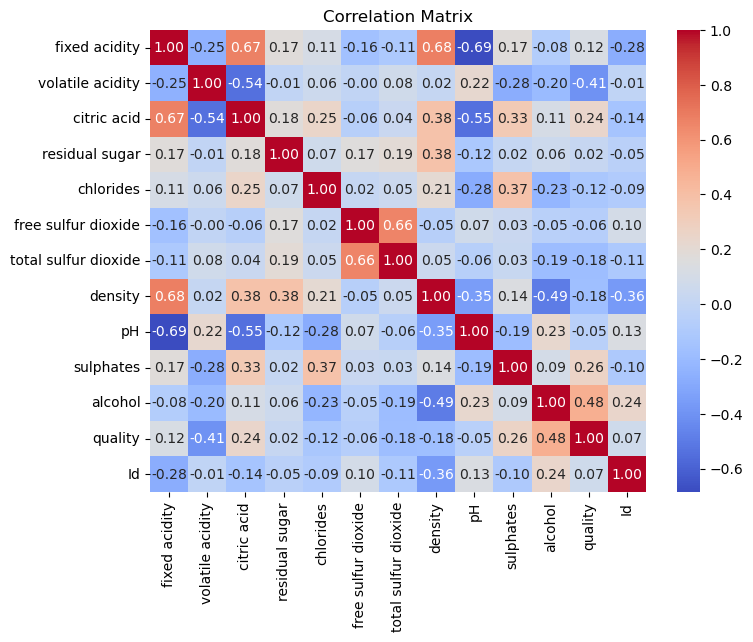

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = wine_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Q1.2.3 Which variable has the strongest positive correlation with quality? Which variable has the strongest negative correlation with quality?

Which variable has the strongest positive correlation with `quality`? Which variable
has the strongest negative correlation with quality?

By examening the heatmap above, we can see that `alcohol` has the highest positive correlation (0.48), and `volatile acidity` has the highest negative correlation (-0.41).


### Q1.2.4 Between alcohol and pH, which do you expect to better predict wine quality? Justify your answer

Between `alcohol` and `pH`, which do you expect to better predict wine quality? Justify
your answer.

Between alcohol and pH, **alcohol** is expected to better predict wine quality. This is because alcohol has the strongest positive correlation with quality (0.48), indicating that higher alcohol content is generally associated with higher wine ratings. In contrast, pH shows almost no correlation with quality (-0.05), suggesting it provides little predictive value.

## 1.3 Linear Regression 

### Q1.3.1 Fit a simple linear regression model using gradient descent to predict quality using only chlorides.

We start by extracting the chlorides as the feature (`X`) and quality as the label (`y`)

In [10]:
X_chlorides = wine_data[["chlorides"]].values   # feature matrix, shape (n_samples, 1)
y = wine_data["quality"].values       # target, shape (n_samples,)

We build a pipeline that first normalizes the feature and then fits a linear regression model using stochastic gradient descent.

In [11]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Build pipeline: scale first, then train linear regression
sgd_model = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="invscaling"))
])

# Fit on training data
sgd_model.fit(X_chlorides, y)


,steps,"[('scaler', ...), ('sgd', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


### Q1.3.2 Fit a simple linear regression model predicting quality using only alcohol.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

X_alcohol = wine_data[["alcohol"]].values 

linreg_model =  Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

linreg_model.fit(X_alcohol, y)

,steps,"[('scaler', ...), ('linreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


### Q1.3.3 Report the regression coefficient and intercept and compare both the models.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# For SGD Regressor
print("sgd_model Coefficient:", sgd_model.named_steps["sgd"].coef_)
print("sgd_model Intercept:", sgd_model.named_steps["sgd"].intercept_)

# For Linear Regression
print("linreg_model Coefficient:", linreg_model.named_steps["linreg"].coef_)
print("linreg_model Intercept:", linreg_model.named_steps["linreg"].intercept_)

sgd_model Coefficient: [-0.10836074]
sgd_model Intercept: [5.65796005]
linreg_model Coefficient: [0.390546]
linreg_model Intercept: 5.6570428696412955


It is (not alarming) that the coefficient is different for both models. This can point to some features being inadecuit for measuring wine quality.

### Q1.3.4 Plot the regression line against the data points. Does the regression line fit the data well for chlorides or alcohol? Why or why not?

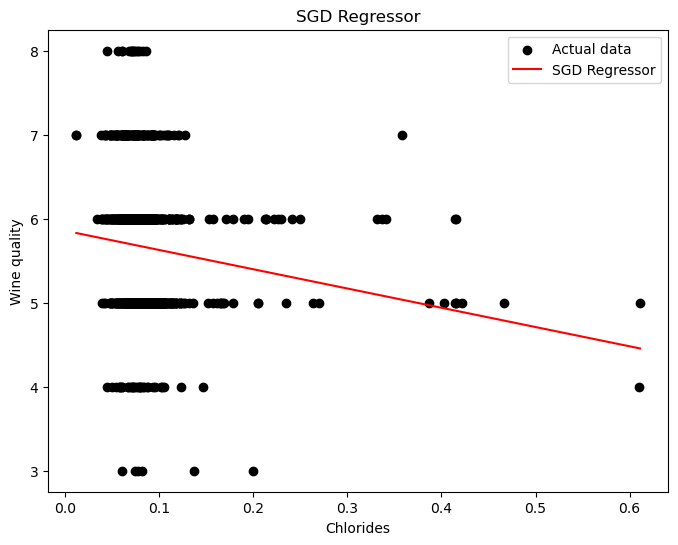

In [14]:
import numpy as np 

y_pred = sgd_model.predict(X_chlorides)

sorted_index = np.argsort(X_chlorides[:, 0])

X_plot = X_chlorides[sorted_index]
y_plot = y_pred[sorted_index]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_chlorides, y, color='black', label='Actual data')
plt.plot(X_plot, y_plot, color='red', label='SGD Regressor')
plt.xlabel('Chlorides')
plt.ylabel('Wine quality')
plt.title('SGD Regressor')
plt.legend()
plt.show()

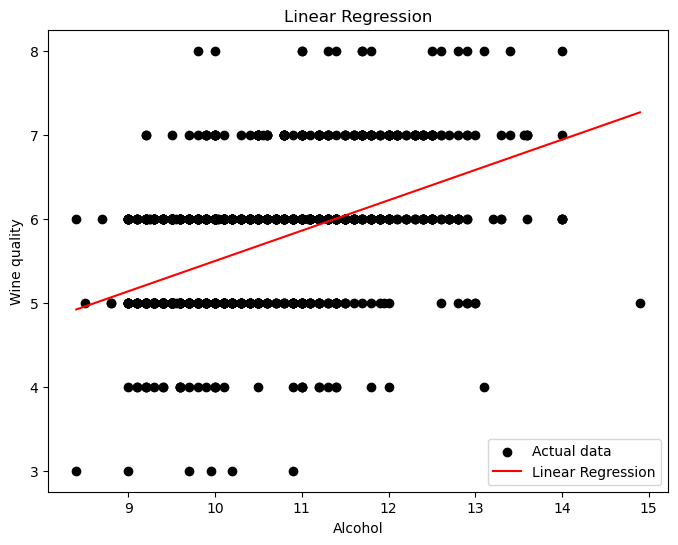

In [15]:
y_pred = linreg_model.predict(X_alcohol)

sorted_index = np.argsort(X_alcohol[:, 0])

X_plot = X_alcohol[sorted_index]
y_plot = y_pred[sorted_index]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_alcohol, y, color='black', label='Actual data')
plt.plot(X_plot, y_plot, color='red', label='Linear Regression')
plt.xlabel('Alcohol')
plt.ylabel('Wine quality')
plt.title('Linear Regression')
plt.legend()
plt.show()

The regression line fits alcohol better than chlorides. Chlorides show almost no correlation with wine quality, so the line barely fits, while alcohol has a weak positive trend that the line captures, making it more predictive.

## 1.4 Train-Test Split
We first need to split the training and test data in a 80/20 split.

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

cross_validation = KFold(n_splits=5, shuffle=True, random_state=42)


Then we performe cross-validation training on the `alcohol` and `chloride` feature.

In [17]:
mse_scores_alcohol, rmse_scores_alcohol, r2_scores_alcohol = [], [], []
pred_alcohol = []

for train_index, test_index in cross_validation.split(X_alcohol):
    X_train, X_test = X_alcohol[train_index], X_alcohol[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)
    pred_alcohol.append(y_pred)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores_alcohol.append(mse)
    rmse_scores_alcohol.append(rmse)
    r2_scores_alcohol.append(r2)

print("MSE scores:", mse_scores_alcohol)
print("RMSE scores:", rmse_scores_alcohol)
print("R² scores:", r2_scores_alcohol)

MSE scores: [0.41703223941181405, 0.5900067672137744, 0.513840423229216, 0.49900203394495796, 0.463410453337623]
RMSE scores: [0.6457803337140379, 0.7681189798551878, 0.716826634012169, 0.7064007601531569, 0.680742574941235]
R² scores: [0.25057954674131566, 0.19880509401166435, 0.24176077340977786, 0.26894226157329704, 0.21220677568583024]


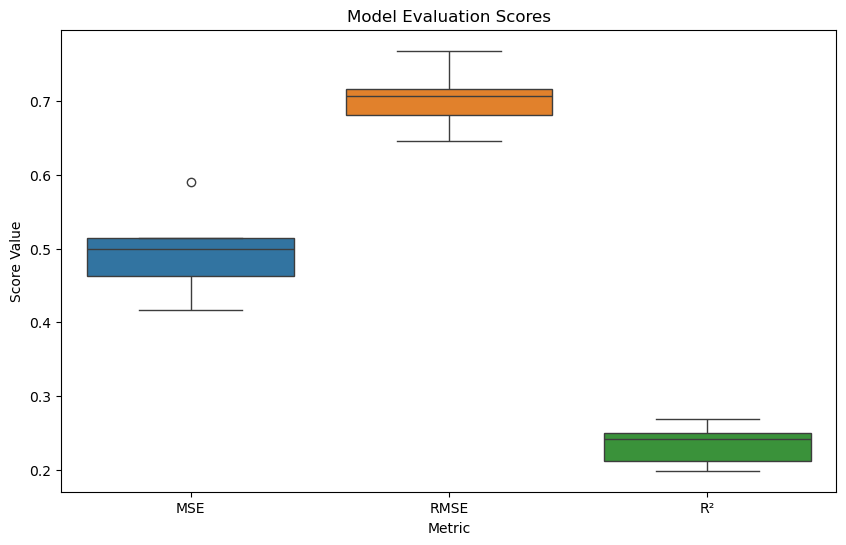

In [33]:
def plotCrossValidation(mse, rmse, r2):

    # Combine the three lists into one list of lists
    scores = [mse, rmse, r2]

    # Create a DataFrame from the list of lists for easier plotting
    scores_df = pd.DataFrame(scores, columns=['Fold ' + str(i+1) for i in range(len(scores[0]))], index=['MSE', 'RMSE', 'R²'])

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Create the boxplot using seaborn
    sns.boxplot(data=scores_df.T)

    # Add labels and title
    plt.title("Model Evaluation Scores")
    plt.ylabel("Score Value")
    plt.xlabel("Metric")

    # Show the plot
    plt.show()

plotCrossValidation(mse_scores_alcohol, rmse_scores_alcohol, r2_scores_alcohol)

### Q1.4.1 How well does alcohol alone predict wine quality in each split?

By examining the different folds, we see that alcohol has a relatively high error rate. The first fold has the lowest RMSE (~0.65), while fold two has the highest (~0.77). The alcohol feature alone explains about 20–27% of the variance in wine quality (R²). While not completely sufficient to predict quality on its own, alcohol is a moderately good predictor of wine quality.


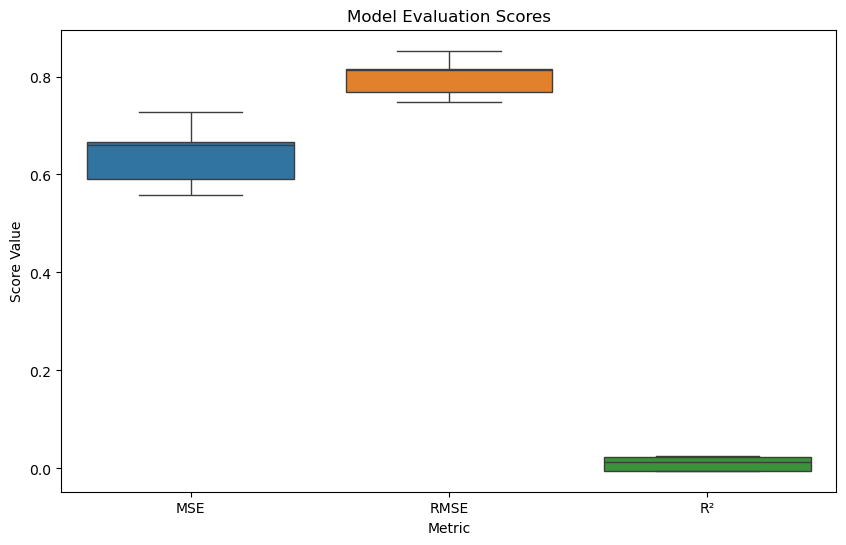

In [19]:

mse_scores_chloride, rmse_scores_chloride, r2_scores_chloride = [], [], []

for train_index, test_index in cross_validation.split(X_chlorides):
    X_train, X_test = X_chlorides[train_index], X_chlorides[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores_chloride.append(mse)
    rmse_scores_chloride.append(rmse)
    r2_scores_chloride.append(r2)

plotCrossValidation(mse_scores_chloride, rmse_scores_chloride, r2_scores_chloride)


### Q1.4.2 How well does chloride alone predict wine quality in each split?

By examining the different folds, we see that chloride has a even higher RMSE than alcohol, indicating worse predictive performance. The first fold has the lowest RMSE (~0.75), while fold two has the highest (~0.85). Chloride alone explains very little variance in wine quality (R² ≈ 0–2%), showing that it is a poor predictor of wine quality on its own.

### Q1.4.3 Do you think the model underfits? Why?

Using a single feature (alcohol or chloride) is too simple to capture the complexity of wine quality. This is reflected in the relatively low R² scores. The errors across the different folds are also consistent, with no fold producing near-perfect predictions. Overall, the models fail to capture most of the variation in wine quality, which is an indicator of underfitting.

In [20]:
print("Alcohol MSE mean:", np.mean(mse_scores_alcohol), "variance:", np.var(mse_scores_alcohol, ddof=1))
print("Alcohol RMSE mean:", np.mean(rmse_scores_alcohol), "variance:", np.var(rmse_scores_alcohol, ddof=1))
print("Alcohol R² mean:", np.mean(r2_scores_alcohol), "variance:", np.var(r2_scores_alcohol, ddof=1))

print("\n")

print("Chloride MSE mean:", np.mean(mse_scores_chloride), "variance:", np.var(mse_scores_chloride, ddof=1))
print("Chloride RMSE mean:", np.mean(rmse_scores_chloride), "variance:", np.var(rmse_scores_chloride, ddof=1))
print("Chloride R² mean:", np.mean(r2_scores_chloride), "variance:", np.var(r2_scores_chloride, ddof=1))

Alcohol MSE mean: 0.4966583834274771 variance: 0.004115095902768356
Alcohol RMSE mean: 0.7035738565351572 variance: 0.002052764784653706
Alcohol R² mean: 0.23445889028437703 variance: 0.0008171614374980307


Chloride MSE mean: 0.6407698937564975 variance: 0.004410159125632368
Chloride RMSE mean: 0.7996171324018898 variance: 0.0017279191573451444
Chloride R² mean: 0.010530527016154867 variance: 0.00021564488016886433


### Q1.4.4 Provide the mean and variance from the 5 different folds and comment on the variation in performance across all 5 folds when using alcohol versus chloride.

Both alcohol and chloride show low variance across folds, meaning the performance is stable across different splits. Alcohol is consistently a better predictor than chloride, with lower RMSE and higher R² scores, while chloride shows consistently poor predictive power.

## 1.5 Multiple Linear Regression 
### Q1.5.1 Train a multiple linear regression model using all features to predict quality using the same splits as used in previous question. Evaluate the model on the test set using MSE, RMSE, and R2.

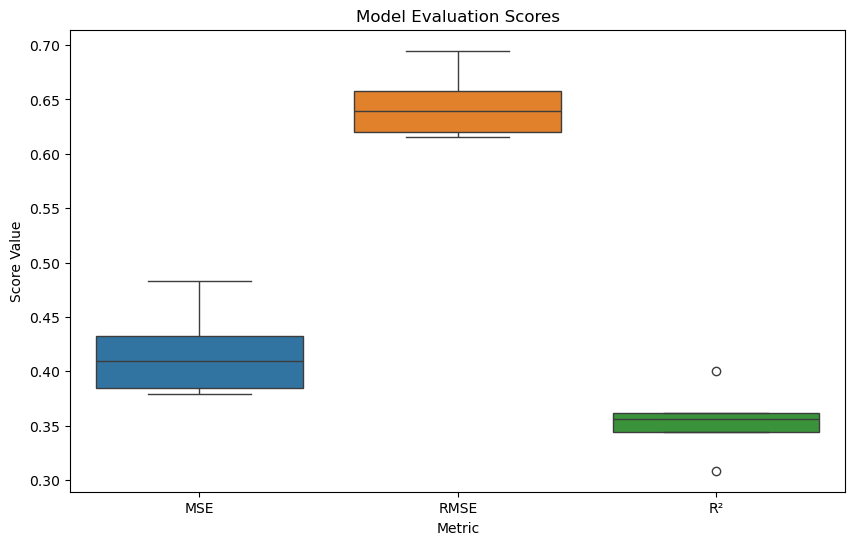

In [21]:
X_all = wine_data.drop(columns=["quality"]).values

mse_scores, rmse_scores, r2_scores = [], [], []
pred_all, y_true = [], []

for train_index, test_index in cross_validation.split(X_all):
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y[train_index], y[test_index]

    sgd_model.fit(X_train, y_train)
    y_pred = sgd_model.predict(X_test)
    pred_all.append(y_pred)
    y_true.append(y_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plotCrossValidation(mse_scores, rmse_scores, r2_scores)

By examining the different folds, we see that using all features results in a lower error rate. The last fold has the lowest RMSE (~0.61), while fold two has the highest (~0.70). The model explains about 31–40% of the variance in wine quality (R²), though there is still unexplained variance (R² < 1), indicating that additional factors or complexity remain unaccounted for.

### Compare the results of simple vs multiple regression in terms of MSE, RMSE, and R2.

Compared to simple regression, multiple regression achieved better predictive performance. The R² score increased, showing that multiple features capture more information and explain more of the variance in wine quality. The multiple regression model also achieved lower RMSE across all folds, indicating more accurate predictions than the simple regression models.

### Q1.5.3 Provide comparison plots for multiple versus simple linear regression solved in previous exercise.

The Residuals Plot was chosen to make a comparason of the models

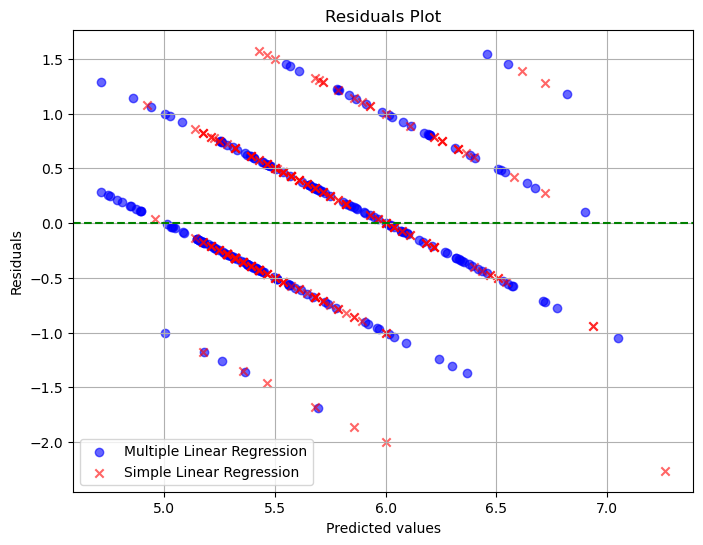

In [22]:
# Multiple Linear Regression
y_pred1 = pred_all[-1]
residuals1 = y_true[-1] - y_pred1

# Simple Linear Regression
y_pred2 = pred_alcohol[0]
residuals2 = y_true[0] - y_pred2


# Creates the Residuals Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred1, residuals1, alpha=0.6, label="Multiple Linear Regression", color='blue', marker='o')
plt.scatter(y_pred2, residuals2, alpha=0.6, label="Simple Linear Regression", color='red', marker='x')

plt.axhline(0, color='green', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.grid(True)
plt.show()

### Q1.5.4 Which model performs better and why?

The multiple linear regression model performs better than the simple linear regression model, as evidenced by its lower RMSE and higher R² scores across all cross-validation folds. This indicates that it explains more variance in the data and makes more accurate predictions.

However, the residuals plot reveals structured patterns for both models, suggesting that they are underfitting and struggling to capture the underlying complexity of the data. This means that while the multiple linear regression model is better in relative terms, a more flexible model or additional feature engineering may be needed to achieve further improvements.

# Exercise-2

### Q2.1 Which features are most suitable/influential in predicting wine quality? (Tip - You can consider feature importance ranking.)

In [23]:
sgd_model.fit(X_all, y)
feature_importance = np.abs(sgd_model.named_steps['sgd'].coef_)

# Feature names
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
    'pH', 'sulphates', 'alcohol', 'Id'
]

# Rank features
importance_ranking = np.argsort(feature_importance)[::-1]  # descending order

print("Feature ranking (most important first):")
for rank, idx in enumerate(importance_ranking, start=1):
    print(f"{rank}. {feature_names[idx]} - Importance: {feature_importance[idx]:.4f}")

Feature ranking (most important first):
1. alcohol - Importance: 0.2870
2. volatile acidity - Importance: 0.1886
3. sulphates - Importance: 0.1427
4. total sulfur dioxide - Importance: 0.0920
5. chlorides - Importance: 0.0730
6. density - Importance: 0.0592
7. pH - Importance: 0.0534
8. fixed acidity - Importance: 0.0507
9. citric acid - Importance: 0.0303
10. free sulfur dioxide - Importance: 0.0293
11. residual sugar - Importance: 0.0250
12. Id - Importance: 0.0179


Based on the feature importance ranking, the most influential features for predicting wine quality are `alcohol`, `volatile acidity` and `sulphates`. These features have the largest absolute coefficients (>0.15), indicating a greater contribution to the model’s predictions.

### Q2.2 The models you trained so far assume a linear relationship between features and target.

#### a) Polynomial regression: Extend the feature space to include quadratic or interaction terms. Does this improve performance?

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline([
    ("deg-2", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="invscaling", penalty='l2'))
])

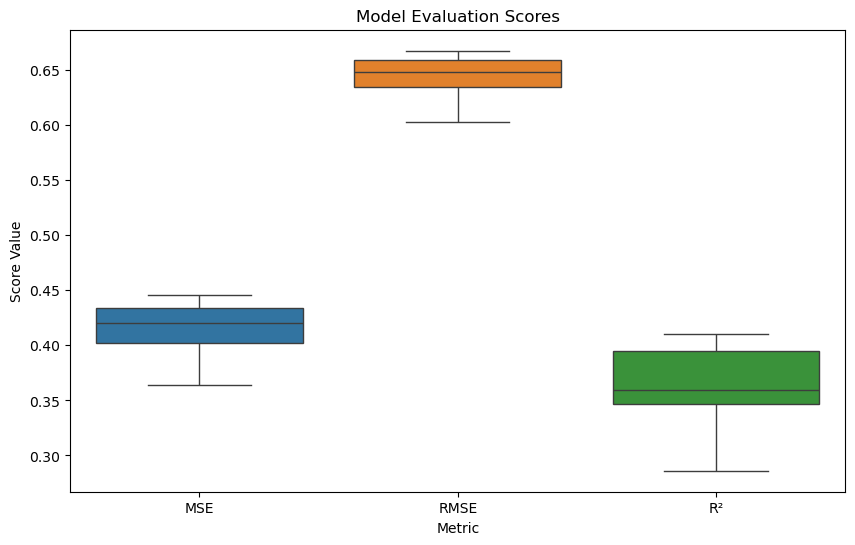

In [25]:
mse_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in cross_validation.split(X_all):
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y[train_index], y[test_index]

    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plotCrossValidation(mse_scores, rmse_scores, r2_scores)

It appears that expanding to a second-degree polynomial does not significantly improve the model’s performance. While some metrics show slight improvement on certain folds, overall the changes are minor and do not provide a substantial benefit.

#### b) Regularization: Train models using Ridge and Lasso regression. How do these methods affect the coefficients and model generalization?

In [26]:
from sklearn.linear_model import RidgeCV

# Define alphas to search over
alphas = np.logspace(-3, 3, 20)  # from 0.001 to 1000

ridge_cv_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=alphas))
])

ridge_cv_model.fit(X_all, y)

# Best alpha chosen
best_alpha = ridge_cv_model.named_steps['ridge'].alpha_
print("Best alpha:", best_alpha)

# Coefficients at best alpha
coefficients = ridge_cv_model.named_steps['ridge'].coef_

# sort indices by absolute value of coefficients
coefficients_sorted = np.argsort(np.abs(coefficients))[::-1]

for idx in coefficients_sorted:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

Best alpha: 54.555947811685144
alcohol: 0.2799
volatile acidity: -0.1901
sulphates: 0.1439
total sulfur dioxide: -0.0926
chlorides: -0.0796
density: -0.0571
pH: -0.0500
fixed acidity: 0.0465
residual sugar: 0.0242
free sulfur dioxide: 0.0236
Id: -0.0165
citric acid: -0.0061


Comparing the coefficients of the normal regression model with the Ridge model, we observe that Ridge regression applies shrinkage to all features, dampening their effect sizes. While the dominant features (such as `alcohol`, `volatile acidity`, etc.) remain prominent, the less influential features are reduced more heavily, leading to a more stable and generalizable model.

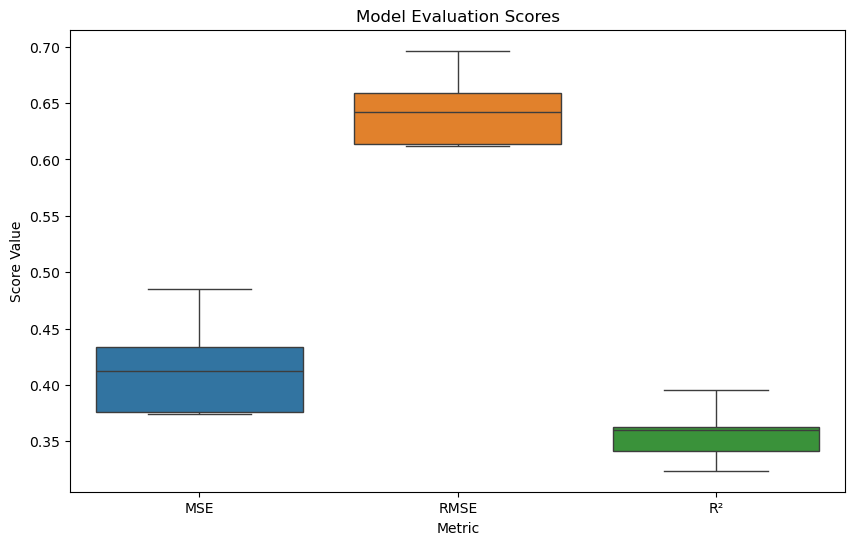

In [27]:
mse_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in cross_validation.split(X_all):
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y[train_index], y[test_index]

    ridge_cv_model.fit(X_train, y_train)
    y_pred = ridge_cv_model.predict(X_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plotCrossValidation(mse_scores, rmse_scores, r2_scores)

We observe marginal improvements in terms of lower RMSE and higher R² scores for Ridge regression compared to the normal linear model. These improvements, though small, indicate greater stability across different folds and suggest that Ridge provides a more robust fit by controlling for overfitting.

In [28]:
from sklearn.linear_model import LassoCV

# Define alphas to search
alphas = np.logspace(-3, 1, 20)  # from 0.001 to 10

lasso_cv_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(alphas=alphas, cv=5, max_iter=5000, random_state=42))
])

lasso_cv_model.fit(X_all, y)

# Best alpha chosen
best_alpha = lasso_cv_model.named_steps['lasso'].alpha_
print("Best alpha:", best_alpha)

# Coefficients at best alpha
coefficients = lasso_cv_model.named_steps['lasso'].coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Best alpha: 0.018329807108324356
fixed acidity: 0.0011
volatile acidity: -0.1961
citric acid: 0.0000
residual sugar: 0.0000
chlorides: -0.0545
free sulfur dioxide: 0.0000
total sulfur dioxide: -0.0594
density: -0.0000
pH: -0.0455
sulphates: 0.1195
alcohol: 0.3076
Id: -0.0000


Comparing the coefficients of the normal regression model with the Lasso model, we observe a more pronounced effect of regularization. Lasso drives weaker features to exactly zero, effectively performing feature selection, while the dominant features remains mostly unchanged. This effectively reduces the dimentional complexity of the model, only holding on to the important features.

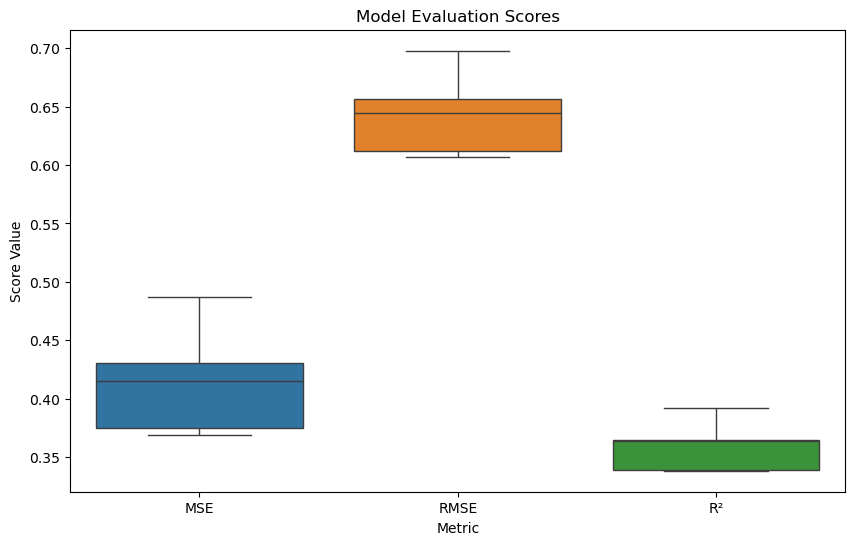

In [29]:
mse_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in cross_validation.split(X_all):
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lasso_cv_model.fit(X_train, y_train)
    y_pred = lasso_cv_model.predict(X_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plotCrossValidation(mse_scores, rmse_scores, r2_scores)

Lasso regression achieves comparable predictive performance to both Ridge and normal linear regression, with similar RMSE and R² scores across folds. This means the simplification done trough feature selection did not really affect the performance of the model. However, the problem still lies in the model underfitting.

#### c) Model comparison: Compare your linear regression results to a non-linear model. Which performs better, and why?
We will compare the results from the linear regression model with a different non-linear model. We start by buling a model using Random Forests.

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('r_forest', RandomForestRegressor(random_state=42))
])

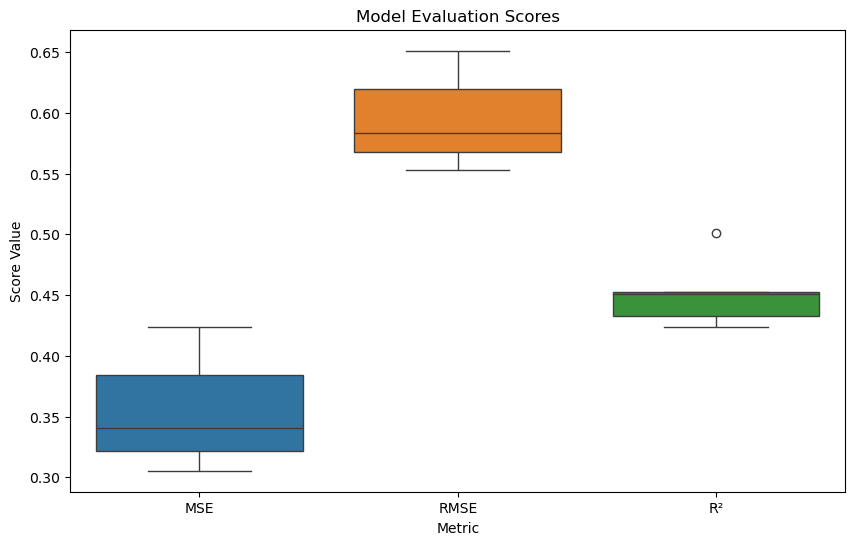

In [31]:
mse_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in cross_validation.split(X_all):
    X_train, X_test = X_all[train_index], X_all[test_index]
    y_train, y_test = y[train_index], y[test_index]

    forest_reg.fit(X_train, y_train)
    y_pred = forest_reg.predict(X_test)

    mse = float(mean_squared_error(y_test, y_pred))
    rmse = float(np.sqrt(mse))
    r2 = float(r2_score(y_test, y_pred))

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

plotCrossValidation(mse_scores, rmse_scores, r2_scores)

By examining the different folds, we see that the Random Forest model outperforms the linear models in terms of RMSE and R² across folds. The first fold has the lowest RMSE (~0.55), while fold two has the highest (~0.65). The model explains about 42–50% of the variance in wine quality. This demonstrates that using a more flexible, non-linear model allows the capture of complex relationships in the data that linear models cannot fully account for.